<a href="https://colab.research.google.com/github/marianaufcg/Capacitacao/blob/main/operadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Soluções numéricas**

Seja a EDO de segunda ordem:
\begin{equation} \frac{\mathrm{d}^2 y}{\mathrm{d} x^2} + 5\frac{\mathrm{d} y}{\mathrm{d} x} + 6y = 0
\end{equation}

Definida para x em [0, 2] com as condições de fronteira dadas:

\
\begin{equation}
y(0) = 0
\\ y(2) = 0,2
\end{equation}

\
Pode-se resolver o sistema pelo **Método das Diferenças Finitas** ou pelo **Método dos Operadores**. Isso porque, por aproximação numérica:

\begin{equation}
\ y_{i}' = \frac{y_{i+1} - y_{i-1}}{2h}
\end{equation}

\
\begin{equation}
\ y_{i}'' = \frac{y_{i+1} - 2y_{i} + y_{i-1}}{h^{2}}
\end{equation}

\
E, partindo desses resultados, resolver a EDO por um dos métodos.

**Método das Diferenças Finitas**

Substituindo as expressões numéricas na equação inicial, obtém-se a relação de recorrência abaixo:

\
\begin{equation}
\frac{y_{i+1} - 2y_{i} + y_{i-1}}{h^{2}} + 5 \cdot \frac{y_{i+1} - 2y_{i} + y_{i-1}}{h^{2}} + 6 \cdot y_{i} = 0
\end{equation}

\
\begin{equation}
\ y_{i+1}\left ( \frac{1}{h^2} + \frac{5}{2h} \right ) +  y_{i}  \left ( \frac{-2}{h^2} + 6 \right )+ y_{i-1}\left ( \frac{1}{h^2} - \frac{5}{2h} \right )= 0
\end{equation}

\
Que, para um intervalo do domínio discretizado em N pontos, com as condições de fronteira, oferece o seguinte sistema:

\
\begin{equation}
 \left\{\begin{matrix}
\ & y_1 & & = 0\\
\alpha \cdot y_1  & +\beta \cdot y_2 &+ \gamma \cdot y_3 & = 0\\
\alpha \cdot y_2  & +\beta \cdot y_3 &+ \gamma \cdot y_4 & = 0 \\
\alpha \cdot y_3  & +\beta \cdot y_4 &+ \gamma \cdot y_5 & = 0 \\
 & [...]  & \\
\  &  y_n & & = 0.2\\
\end{matrix}\right.
\end{equation}

\
Onde

\
\begin{equation}
\alpha = \frac{1}{h^2} - \frac{5}{2h}
\end{equation}

\
\begin{equation}
\beta = \frac{-2}{h^2} + 6
\end{equation}

\
\begin{equation}
\gamma= \frac{1}{h^2} + \frac{5}{2h}
\end{equation}

\
O que nos leva a um sistema de matrizes. A fins ilustrativos, se N = 5:

\
\begin{equation}
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
\alpha & \beta & \gamma & 0 & 0 \\
0 & \alpha & \beta & \gamma & 0 \\
0 & 0 & \alpha & \beta & \gamma  \\
0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0 \\
0 \\
0.2 \\
\end{bmatrix}
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 11                  # Numero de pontos
intervalo = 2           # Intervalo
h = intervalo / (n-1)   # Espaçamento
y0 = 0                  # Ponto inicial
yf = 0.2                # Ponto final

In [ ]:
# Matriz dos coeficientes

alpha = (1/np.power(h, 2)) - (5/(2*h))
beta = (-2/np.power(h, 2)) + 6
gamma = (1/np.power(h, 2)) + (5/(2*h))

matriz_coeficientes = np.zeros((n, n))

for i in range (1, n-1):

  matriz_coeficientes[i][i-1] = alpha
  matriz_coeficientes[i][i] = beta
  matriz_coeficientes[i][i+1] = gamma

matriz_coeficientes[0][0] = 1
matriz_coeficientes[n-1][n-1] = 1

# Matriz coluna

matriz_coluna = np.zeros((n, 1))
matriz_coluna[0] = y0
matriz_coluna[n-1] = yf

# Solução

yc = np.linalg.solve(matriz_coeficientes, matriz_coluna)


**Método dos Operadores**



In [ ]:
# Matrizes Dx^2 e Dx

matriz_Dx2 = np.zeros((n, n))
matriz_Dx = np.zeros((n, n))

for i in range (0, n):

  matriz_Dx2[i][i] = -2

  if (i > 0):
    matriz_Dx2[i][i-1] = 1
    matriz_Dx[i][i-1] = -1

  if (i < n-1):
    matriz_Dx2[i][i+1] = 1
    matriz_Dx[i][i+1] = 1

matriz_Dx2 = matriz_Dx2 / np.power(h, 2)
matriz_Dx = matriz_Dx / (2*h)

# Operador geral de y

matriz_operador = (5*matriz_Dx) + (matriz_Dx2) + (6 * np.identity(n))

# Condições de fronteira no Operador

matriz_operador[0][:] = 0
matriz_operador[n-1][:] = 0
matriz_operador[0][0] = 1
matriz_operador[n-1][n-1] = 1

# Solução

yo = np.linalg.solve(matriz_operador, matriz_coluna)

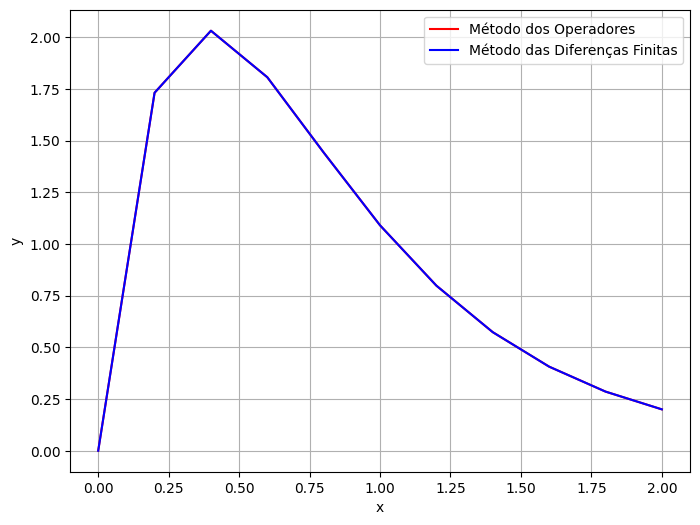


[[  1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 12.5 -44.   37.5   0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.   12.5 -44.   37.5   0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.   12.5 -44.   37.5   0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.   12.5 -44.   37.5   0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.   12.5 -44.   37.5   0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.   12.5 -44.   37.5   0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.   12.5 -44.   37.5   0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.   12.5 -44.   37.5   0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.   12.5 -44.   37.5]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1. ]]

[[  1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ 12.5 -44.   37.5   0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.   12.5 -44.   37.5   0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.   12.5 -44.   37.5

In [ ]:
# Intervalo do domínio

x = np.linspace(0, intervalo, n)

# Plotagem

plt.figure(figsize=(8, 6))
plt.plot(x, yo, label='Método dos Operadores', color='red')
plt.plot(x, yc, label='Método das Diferenças Finitas', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
print()
print(matriz_coeficientes)
print()
print(matriz_operador)